In [1]:
import numpy as np
import matplotlib.pyplot as plt

import limpy.lines as ll
import limpy.params as p
import limpy.utils as lu

In [2]:
import limpy.cosmos as cosmos

In [3]:
cosmo_setup= cosmos.cosmo(h=0.9)

In [4]:
import limpy.theory as lt

In [5]:
lt.theory(cosmo_setup=cosmo_setup)

Parameters used in cosmo_setup:
Hubble constant (h): 0.9
Omega matter (Omega_m): 0.3111


In [3]:
# Check first what are the available models of star formation rate
# sfr_model: available star formation model
# models: Models that convert sfr to line luminosities
sfr_model, line_lum_models = p.model_avail(line_name="CO21")
print("Available models for sfr --->", sfr_model)

print("Available models for sfr --->", line_lum_models)

AttributeError: module 'limpy.params' has no attribute 'model_avail'

In [4]:
"""
calculate line luminosity
"""
line_name = "CII158"
sfr_model = "Silva15"
Mhalo = np.logspace(10, 14)
z= 5.8

lum_line = ll.mhalo_to_lline(Mhalo, z, line_name=line_name, model_name="Fonseca16", 
                          sfr_model=sfr_model, use_scatter=False,)

Text(0.5, 0, '$M_{halo}\\, [M_\\odot/h]$')

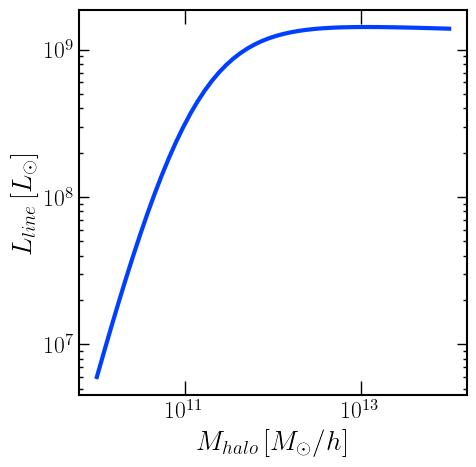

In [5]:
# plot it
fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)

plt.plot(Mhalo , lum_line, lw=3)

plt.yscale("log")
plt.xscale("log")
plt.ylabel("$L_{line}\, [L_\odot]$")
plt.xlabel("$M_{halo}\, [M_\odot/h]$")

In [6]:
"""
Plot sfr vs M_halo for different sfr models
"""
# Mass of halos 
Mhalo= np.logspace(10, 15)

#redshift
z=6
sfr_silva = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Silva15")
sfr_tng100 = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Tng100")
sfr_tng300 = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Tng300")
sfr_fonseca = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Fonseca16")
sfr_Beherozzi = ll.mhalo_to_sfr(Mhalo, z, sfr_model="Behroozi19")

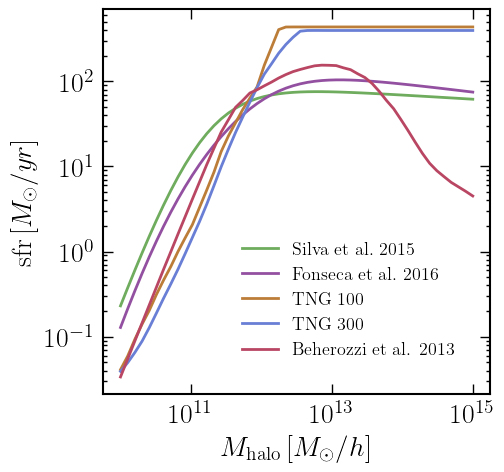

In [7]:
"""
Plot sfr vs M_halo for different sfr models
"""
colorlist=["#6fac5d",
"#9350a1",
"#bc7d39",
"#697ed5",
"#b94663"]

fig = plt.figure(figsize=(5, 5), dpi=100)
ax=fig.add_subplot(111)
lw=2
ls='-'
tick_labelsize=20
pad_point=6

ax.tick_params('both', which='major', pad=pad_point, labelsize=tick_labelsize, length=7, width=1, direction='in', top=True, right=True)
ax.tick_params('both', which='minor', pad=pad_point, labelsize=tick_labelsize,  length=3, width=1, direction='in', top=True, right=True)


ax.plot(Mhalo, sfr_silva,lw=lw, ls =ls, color=colorlist[0], label="Silva et al.\ 2015")
ax.plot(Mhalo, sfr_fonseca,lw=lw, ls = ls, color=colorlist[1], label="Fonseca et al.\ 2016")
ax.plot(Mhalo, sfr_tng100,lw=lw, ls = ls, color=colorlist[2], label="TNG 100")
ax.plot(Mhalo, sfr_tng300,lw=lw, ls = ls, color=colorlist[3], label="TNG 300")
ax.plot(Mhalo, sfr_Beherozzi,lw=lw, ls = ls, color=colorlist[4], label="Beherozzi et al. 2013")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$M_{\rm halo}\, [M_\odot/ h]$")
ax.set_ylabel(r"$\mathrm{sfr}\,[M_\odot/yr]$")

ax.legend(loc=0, frameon=False)


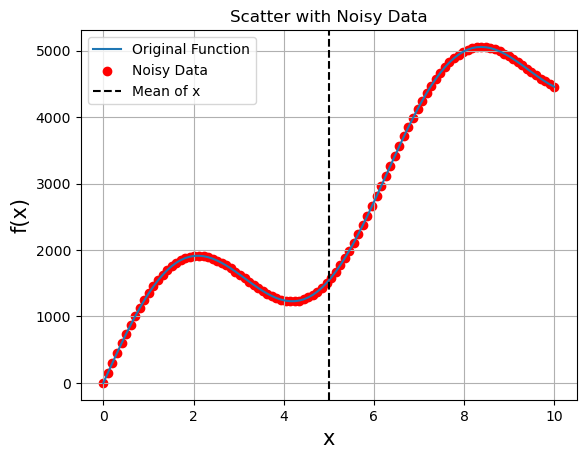

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function f(x)
def f(x):
    return np.sin(x) + 0.5 * x

# Generate some x values
x = np.linspace(0, 10, 100)

# Calculate the mean value of x
mean_x = np.mean(x)

# Calculate the function values
y = 1000 * f(x)

# Add random noise to y based on the mean value of x
sigma = 0.6  # Standard deviation for the noise
y_noise = y + np.random.normal(loc=0, scale=sigma, size=len(y))

# Plot the original function and the noisy data
plt.plot(x, y, label='Original Function')
plt.scatter(x, y_noise, color='red', label='Noisy Data')
plt.axvline(x=mean_x, linestyle='--', color='black', label='Mean of x')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scatter with Noisy Data')
plt.legend()
plt.grid(True)
plt.show()


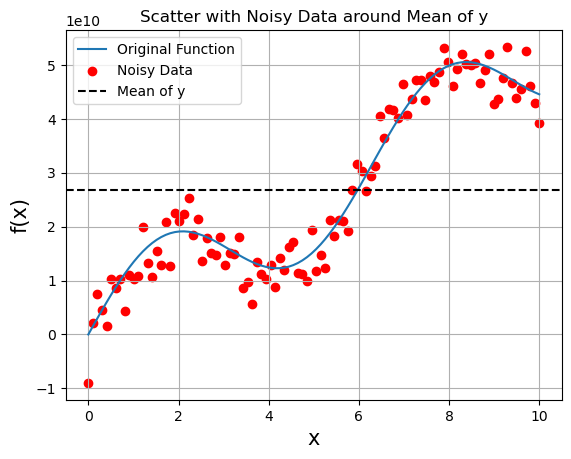

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function f(x)
def f(x):
    return np.sin(x) + 0.5 * x

# Generate some x values
x = np.linspace(0, 10, 100)

# Calculate the function values
y = 1e10 * f(x)

# Calculate the mean value of y
mean_y = np.mean(y)

# Specify the standard deviation corresponding to 0.2 dex
sigma_dex = 0.05

# Convert sigma_dex to linear scale (since dex is a logarithmic unit)
sigma_linear = mean_y * (10**(sigma_dex) - 1)

# Generate random values from a normal distribution around the mean value of y
# with the specified standard deviation
y_noise = y + np.random.normal(loc=0, scale=sigma_linear, size=len(y))

# Plot the original function and the noisy data
plt.plot(x, y, label='Original Function')
plt.scatter(x, y_noise, color='red', label='Noisy Data')
plt.axhline(y=mean_y, linestyle='--', color='black', label='Mean of y')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scatter with Noisy Data around Mean of y')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
def merge_dicts(dict1, dict2):
    merged_dict = {**dict1, **dict2}
    return merged_dict

# Example usage:
defaults = {'a': 1, 'b': 2}
line_params = {'a': 3, 'd': 4}

In [23]:
merged_params = merge_dicts(defaults, line_params)
print(merged_params)

{'a': 3, 'b': 2, 'd': 4}


In [72]:


# Example usage:
defaults = {'a': 1, 'b': 1}
line_params = {'a': 1, 'd': 6}

merged_dict = {**defaults , **line_params}

In [73]:
print(merged_dict)

{'a': 1, 'b': 1, 'd': 6}


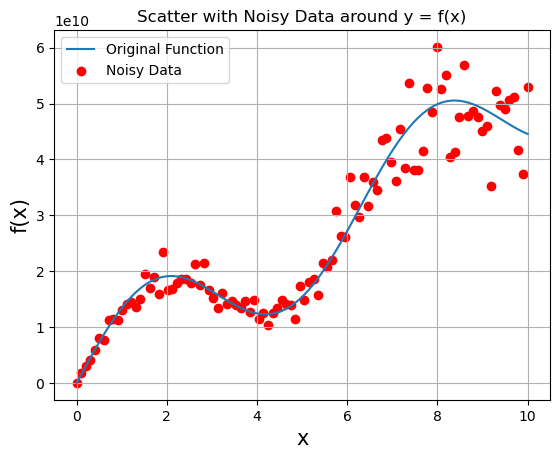

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function f(x)
def f(x):
    return np.sin(x) + 0.5 * x

# Generate some x values
x = np.linspace(0, 10, 100)

# Calculate the function values
y = 1e10 * f(x)

# Specify the standard deviation corresponding to 0.2 dex
sigma_dex = 0.05

# Convert sigma_dex to linear scale (since dex is a logarithmic unit)
sigma_linear = y * (10**(sigma_dex) - 1)

# Generate random values from a normal distribution around the function values
# with the specified standard deviation
y_noise = y + np.random.normal(loc=0, scale=sigma_linear, size=len(y))

# Plot the original function and the noisy data
plt.plot(x, y, label='Original Function')
plt.scatter(x, y_noise, color='red', label='Noisy Data')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scatter with Noisy Data around y = f(x)')
plt.legend()
plt.grid(True)
plt.show()


IndexError: index 10 is out of bounds for axis 0 with size 10

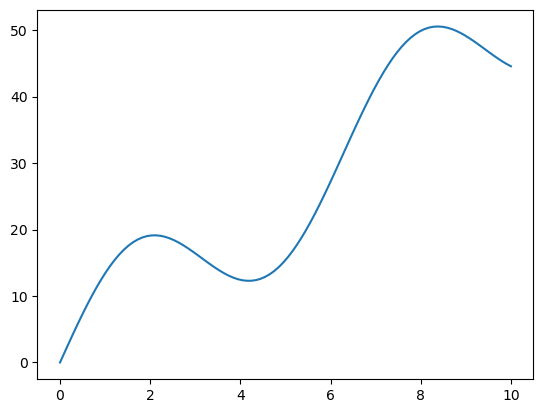

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function f(x)
def f(x):
    return np.sin(x) + 0.5 * x

# Generate some x values
x = np.linspace(0, 10, 100)

# Calculate the function values
y = 1e1 * f(x)

# Specify the number of bins
num_bins = 10

# Calculate the bin edges
bin_edges = np.linspace(np.min(y), np.max(y), num_bins+1)

# Calculate the bin indices for each y value
bin_indices = np.digitize(y, bin_edges)

# Calculate the mean of each bin
bin_means = np.array([np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)])

# Specify the standard deviation corresponding to 0.2 dex
sigma_dex = 0.05

# Convert sigma_dex to linear scale (since dex is a logarithmic unit)
sigma_linear = bin_means * (10**(sigma_dex) - 1)

# Generate random values from a normal distribution around the mean of each bin
# with the specified standard deviation
y_noise = np.array([bin_mean + np.random.normal(loc=0, scale=sigma_linear[i]) for i, bin_mean in enumerate(bin_means)])

# Plot the original function and the noisy data
plt.plot(x, y, label='Original Function')
plt.scatter(x, y_noise[bin_indices-1], color='red', label='Noisy Data')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scatter with Noisy Data around Mean of y in Bins')
plt.legend()
plt.grid(True)
plt.show()


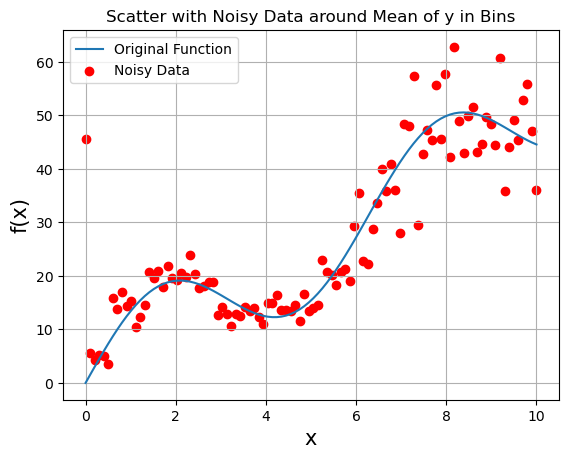

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function f(x)
def f(x):
    return np.sin(x) + 0.5 * x

# Generate some x values
x = np.linspace(0, 10, 100)

# Calculate the function values
y = 1e1 * f(x)

# Specify the number of bins
num_bins = 6

# Calculate the bin edges
bin_edges = np.linspace(np.min(y), np.max(y), num_bins+1)

# Calculate the bin indices for each y value
bin_indices = np.digitize(y, bin_edges, right=True)

# Calculate the mean of each bin
bin_means = np.array([np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)])

# Specify the standard deviation corresponding to 0.2 dex
sigma_dex = 0.05

# Convert sigma_dex to linear scale (since dex is a logarithmic unit)
sigma_linear = bin_means * (10**(sigma_dex) - 1)

# Generate random values from a normal distribution around the mean of each bin
# with the specified standard deviation
y_noise = np.array([bin_means[i-1] + np.random.normal(loc=0, scale=sigma_linear[i-1]) for i in bin_indices])

# Plot the original function and the noisy data
plt.plot(x, y, label='Original Function')
plt.scatter(x, y_noise, color='red', label='Noisy Data')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scatter with Noisy Data around Mean of y in Bins')
plt.legend()
plt.grid(True)
plt.show()


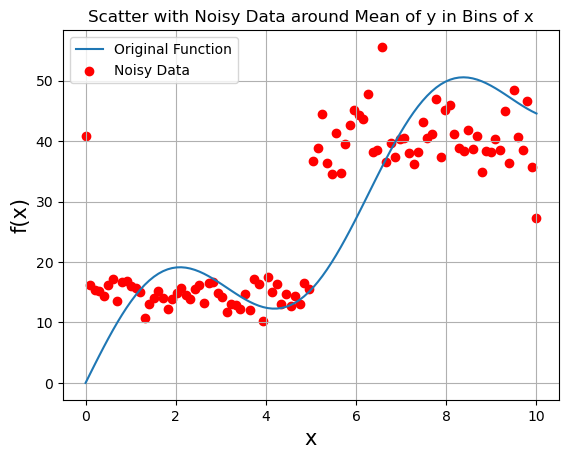

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function f(x)
def f(x):
    return np.sin(x) + 0.5 * x

# Generate some x values
x = np.linspace(0, 10, 100)

# Calculate the function values
y = 1e1 * f(x)

# Specify the number of bins for x
num_bins = 2

# Calculate the bin edges for x
bin_edges = np.linspace(np.min(x), np.max(x), num_bins+1)

# Calculate the bin indices for each x value
bin_indices = np.digitize(x, bin_edges, right=True)

# Calculate the mean of y in each x bin
bin_means = np.array([np.mean(y[bin_indices == i]) for i in range(1, num_bins+1)])

# Specify the standard deviation corresponding to 0.2 dex
sigma_dex = 0.05

# Convert sigma_dex to linear scale (since dex is a logarithmic unit)
sigma_linear = bin_means * (10**(sigma_dex) - 1)

# Generate random values from a normal distribution around the mean of each bin
# with the specified standard deviation
y_noise = np.array([bin_means[i-1] + np.random.normal(loc=0, scale=sigma_linear[i-1]) for i in bin_indices])

# Plot the original function and the noisy data
plt.plot(x, y, label='Original Function')
plt.scatter(x, y_noise, color='red', label='Noisy Data')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scatter with Noisy Data around Mean of y in Bins of x')
plt.legend()
plt.grid(True)
plt.show()


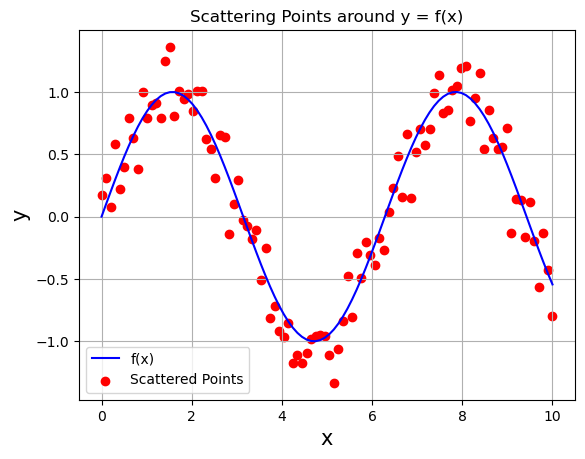

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function
def f(x):
    return np.sin(x)  # Example function, you can replace it with your own

# Generate x-values within a specific range
x = np.linspace(0, 10, 100)  # Example range

# Calculate y-values using the function
y = f(x)

# Add random noise to the y-values
noise_factor = 0.2  # Adjust this value to control the spread of points
y_with_noise = y + np.random.normal(0, noise_factor, len(y))

# Plot the function
plt.plot(x, y, label='f(x)', color='blue')

# Scatter points around the function
plt.scatter(x, y_with_noise, color='red', label='Scattered Points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scattering Points around y = f(x)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


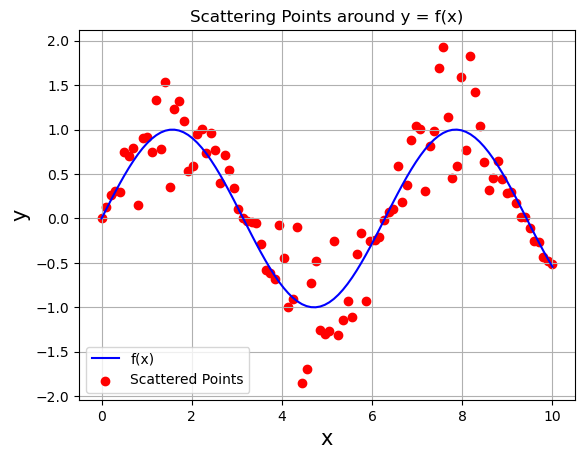

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function
def f(x):
    return np.sin(x)  # Example function, you can replace it with your own

# Generate x-values within a specific range
x = np.linspace(0, 10, 100)  # Example range

# Calculate y-values using the function
y = f(x)

# Add random noise to the y-values
noise_factor = 0.5  # Spread of 0.2 dex
y_with_noise = y + y * noise_factor * np.random.normal(0, 1, len(y))

# Plot the function
plt.plot(x, y, label='f(x)', color='blue')

# Scatter points around the function
plt.scatter(x, y_with_noise, color='red', label='Scattered Points')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scattering Points around y = f(x)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [120]:
mean = (1, 2)

In [121]:
cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([0, 0], cov, size=800)

-3.2406533112110356

In [131]:
pts[:,0][1]

2.458355586975037

In [130]:
pts

array([[ 2.51957436, -2.69268818],
       [-1.50118589,  2.45835559],
       [ 2.94447447, -3.24065331],
       ...,
       [ 0.32273292,  0.00561223],
       [ 2.02025191, -1.4845936 ],
       [-3.25281793,  1.93223989]])

In [6]:
import limpy.lines as ll

In [7]:
mh=np.logspace(10,13, num=500)

lc1=ll.LineConverter(mh,4, model_name="Alma_scalling", line_params={'use_scatter':True}).calculate_line(mh,4)
lc2=ll.LineConverter(mh,4, model_name="Alma_scalling", line_params={'use_scatter':True}).calculate_line(mh,4)
lc3=ll.LineConverter(mh,4, model_name="Alma_scalling", line_params={'use_scatter':True}).calculate_line(mh,4)

In [8]:
lc4=ll.LineConverter(mh,4, model_name="Alma_scalling", line_params={'use_scatter':False}).calculate_line(mh,4)

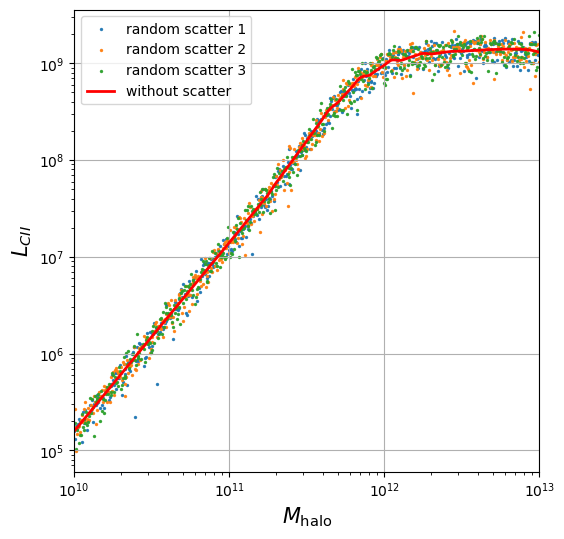

In [14]:
# Plotting
%matplotlib inline


plt.figure(figsize=(6, 6))

s = 2
plt.scatter(mh, lc1, label='random scatter 1', s=s, alpha=0.9)
plt.scatter(mh, lc2, label='random scatter 2', s=s, alpha=0.9)
plt.scatter(mh, lc3, label='random scatter 3', s=s, alpha=0.9)

plt.plot(mh, lc4, lw=2, color="r", label="without scatter")

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e10, 1e13)

plt.xlabel(r'$M_{\rm halo}$')
plt.ylabel(r'$L_{CII}$')
plt.legend()
plt.grid(True)


plt.savefig("lim_scatter.pdf", bbox_inches="tight")